In [6]:
import cv2
import numpy as np
import matplotlib . pyplot as plt
# termination criteria
criteria = ( cv2 . TERM_CRITERIA_EPS + cv2 . TERM_CRITERIA_MAX_ITER , 30 , 0.001)
calibration_flags = cv2 . fisheye.CALIB_RECOMPUTE_EXTRINSIC + cv2 . fisheye .CALIB_FIX_SKEW
# inner size of chessboard
width = 9
height = 6
square_size = 0.025 # 0.025 meters

# prepare object points , like (0 ,0 ,0) , (1 ,0 ,0) , (2 ,0 ,0) .... ,(8 ,6 ,0)
objp = np . zeros (( height * width , 1 , 3) , np . float64 )
objp [: , 0 , :2] = np . mgrid [0: width , 0: height ]. T . reshape ( -1 , 2)
objp = objp * square_size # Create real world coords . Use your metric .
# Arrays to store object points and image points from all the images .
objpoints = [] # 3 d point in real world space
imgpoints = [] # 2 d points in image plane .
img_width = 640
img_height = 480
image_size = ( img_width , img_height )
path = ""
image_dir = path + "pairs/"

number_of_images = 50
for i in range (1 , number_of_images ) :
# read image
    img = cv2 . imread ( image_dir + "left_%02d.png"%i )
    gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret , corners = cv2 . findChessboardCorners ( gray , ( width , height ) , cv2 .
    CALIB_CB_ADAPTIVE_THRESH + cv2 . CALIB_CB_FAST_CHECK + cv2 .
    CALIB_CB_NORMALIZE_IMAGE )
    Y , X , channels = img . shape

    # skip images where the corners of the chessboard are too close to the edges of

    if ( ret == True ) :
        minRx = corners [: ,: ,0]. min ()
        maxRx = corners [: ,: ,0]. max ()
        minRy = corners [: ,: ,1]. min ()
        maxRy = corners [: ,: ,1]. max ()
        border_threshold_x = X /12
        border_threshold_y = Y /12
        x_thresh_bad = False
        if ( minRx < border_threshold_x ) :
            x_thresh_bad = True
        y_thresh_bad = False
        if ( minRy < border_threshold_y ) :
            y_thresh_bad = True
        if ( y_thresh_bad == True ) or ( x_thresh_bad == True ) :
            continue

    if ret == True :
        objpoints . append ( objp )
        # improving the location of points ( sub - pixel )
        corners2 = cv2 . cornerSubPix ( gray , corners , (3 , 3) , ( -1 , -1) , criteria )
        imgpoints . append ( corners2 )
        # Draw and display the corners
        # Show the image to see if pattern is found ! imshow function .
        cv2 . drawChessboardCorners ( img , ( width , height ) , corners2 , ret )
        cv2 . imshow ( " Corners " , img )
        cv2 . waitKey (5)
    else :
        print ( " Chessboard couldn ’t detected . Image pair : " , i )
        continue

N_OK = len ( objpoints )
K = np . zeros ((3 , 3) )
D = np . zeros ((4 , 1) )
rvecs = [np . zeros ((1 , 1 , 3) , dtype = np . float64 ) for i in range ( N_OK ) ]
tvecs = [np . zeros ((1 , 1 , 3) , dtype = np . float64 ) for i in range ( N_OK ) ]
ret , K , D , _ , _ = \
cv2 . fisheye . calibrate (
objpoints ,
imgpoints ,
image_size ,
K ,
D ,
rvecs ,
tvecs ,
calibration_flags ,
( cv2 . TERM_CRITERIA_EPS + cv2 . TERM_CRITERIA_MAX_ITER , 30 , 1e-6)
)
# Let ’s rectify our results
map1 , map2 = cv2 . fisheye . initUndistortRectifyMap (K , D , np . eye (3) , K , image_size ,
cv2 . CV_16SC2 )

cv2.destroyAllWindows()

In [3]:
print(" K = " , K )
print(" D = " , D )
print(" rvecs = " , rvecs )
print(" tvecs = " , tvecs )
print(" ret = " , ret )

 K =  [[335.39124594   0.         345.29455183]
 [  0.         335.22283549 232.92700067]
 [  0.           0.           1.        ]]
 D =  [[-0.02430673]
 [-0.018878  ]
 [ 0.02584017]
 [-0.01508828]]
 rvecs =  [array([[[0., 0., 0.]]]), array([[[0., 0., 0.]]]), array([[[0., 0., 0.]]]), array([[[0., 0., 0.]]]), array([[[0., 0., 0.]]]), array([[[0., 0., 0.]]]), array([[[0., 0., 0.]]]), array([[[0., 0., 0.]]]), array([[[0., 0., 0.]]]), array([[[0., 0., 0.]]]), array([[[0., 0., 0.]]]), array([[[0., 0., 0.]]]), array([[[0., 0., 0.]]]), array([[[0., 0., 0.]]]), array([[[0., 0., 0.]]]), array([[[0., 0., 0.]]]), array([[[0., 0., 0.]]]), array([[[0., 0., 0.]]]), array([[[0., 0., 0.]]]), array([[[0., 0., 0.]]]), array([[[0., 0., 0.]]]), array([[[0., 0., 0.]]]), array([[[0., 0., 0.]]]), array([[[0., 0., 0.]]]), array([[[0., 0., 0.]]]), array([[[0., 0., 0.]]]), array([[[0., 0., 0.]]]), array([[[0., 0., 0.]]]), array([[[0., 0., 0.]]]), array([[[0., 0., 0.]]]), array([[[0., 0., 0.]]]), array([[[0., 0

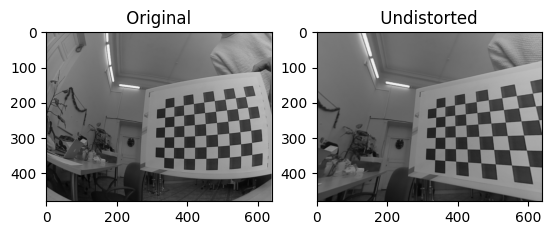

In [5]:
import matplotlib.pyplot as plt

image = cv2.imread(image_dir + "left_%02d.png"%20)

plt.subplot (121)
plt.imshow ( image )
plt.title ( " Original " )

undistorted_image = cv2 . remap ( image , map1 , map2 , interpolation = cv2 . INTER_LINEAR ,
borderMode = cv2 . BORDER_CONSTANT )

plt.subplot (122)
plt.imshow ( undistorted_image )
plt.title ( " Undistorted " )
plt.show()